In [37]:
import pandas as pd

#Reads CSV files saved from picoscope
def read_wave(csv):
    df = pd.read_csv(csv, skiprows=[1])
    
    time_us = df['Time'] * 1E-6
    trigger = df['Channel A']
    wavedata = df['Channel B'] + 1.0
    
    start = np.where(trigger>1.5)[0][0]
    end = np.where(trigger>1.5)[0][-1]
    
    return time_us, wavedata, (start, end)

# HW-AES, VCC-EXT vs VCC-INT Measurements

In [121]:
hwpico_time, hwpico_wave, hwpico_trigloc = read_wave('hwaes-picoemp-14pulseofpicoemp.csv')
hw_time, hw_wave, hw_trigloc = read_wave('hwaes-noinjection.csv')
hwvgl_time, hwvgl_wave, hwvgl_trigloc = read_wave('hwaes_vglitch_1cycleenable_15mhz.csv')
hwbbi_time, hwbbi_wave, hwbbi_trigloc = read_wave('hwaes-bbi-extvcc.csv')

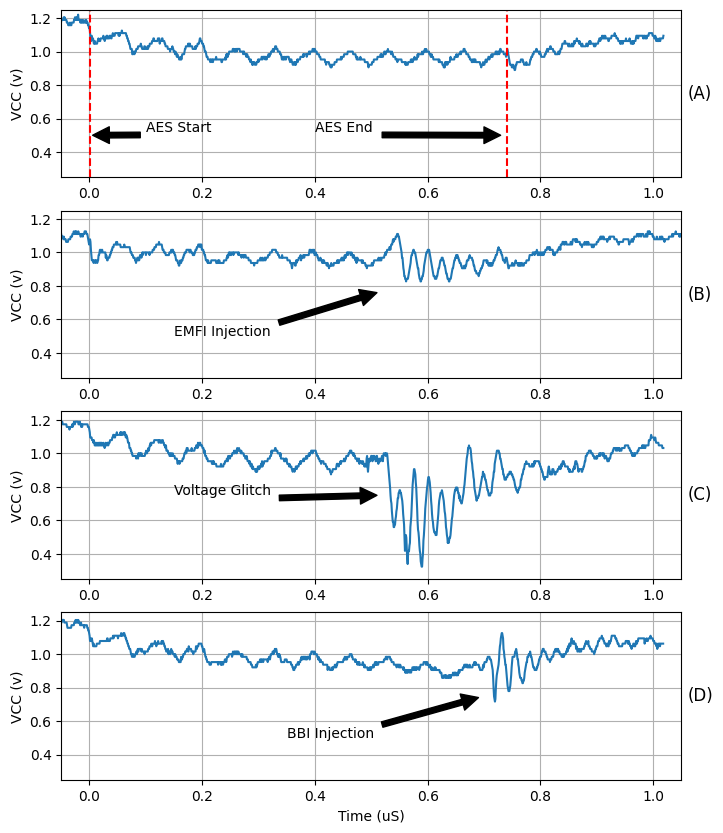

In [253]:
import matplotlib.pylab as plt
import numpy as np

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,10))

ax[0].plot(hw_time[3000:4400]*1e6, hw_wave[3000:4400])
ax[0].plot([hw_time[hw_trigloc[0]]*1e6, hw_time[hw_trigloc[0]]*1e6], [0.25,1.25], 'r--')
ax[0].plot([hw_time[hw_trigloc[1]]*1e6, hw_time[hw_trigloc[1]]*1e6], [0.25,1.25], 'r--')
ax[0].set_ylim([0.25, 1.25])
ax[0].set_xlim([-0.05, 1.05])
ax[0].grid(True)
ax[0].set_ylabel("VCC (v)")
ax[0].annotate('AES Start', xy=(hw_time[hw_trigloc[0]]*1e6, 0.50), xytext=(0.1, 0.52),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax[0].annotate('AES End', xy=(hw_time[hw_trigloc[1]]*1e6, 0.50), xytext=(0.4, 0.52),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax[0].set_title("(A)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')


ax[1].plot(hwpico_time[3000:4400]*1e6, hwpico_wave[3000:4400])
ax[1].set_ylim([0.25, 1.25])
ax[1].set_xlim([-0.05, 1.05])
ax[1].grid(True)
ax[1].annotate('EMFI Injection', xy=(0.52, 0.77), xytext=(0.15, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax[1].set_ylabel("VCC (v)")
ax[1].set_title("(B)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')



ax[2].plot(hwvgl_time[3000:4400]*1e6, hwvgl_wave[3000:4400])
ax[2].set_ylim([0.25, 1.25])
ax[2].set_xlim([-0.05, 1.05])
ax[2].grid(True)
ax[2].set_ylabel("VCC (v)")
ax[2].annotate('Voltage Glitch', xy=(0.52, 0.75), xytext=(0.15, 0.75),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax[2].set_title("(C)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')


ax[3].plot(hwbbi_time[3000:4400]*1e6, hwbbi_wave[3000:4400])
ax[3].set_ylim([0.25, 1.25])
ax[3].set_xlim([-0.05, 1.05])
ax[3].grid(True)
ax[3].set_xlabel("Time (uS)")
ax[3].set_ylabel("VCC (v)")
ax[3].annotate('BBI Injection', xy=(0.7, 0.75), xytext=(0.35, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax[3].set_title("(D)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')

fig.savefig("FigureHWAESVCCEXT.eps", bbox_inches='tight')
fig.savefig("FigureHWAESVCCEXT.png", bbox_inches='tight')


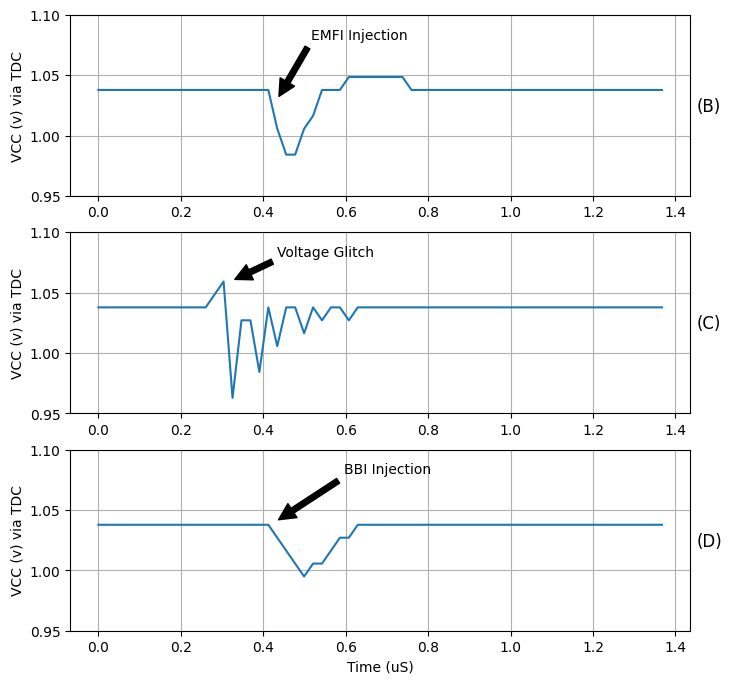

In [348]:


fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

trace = np.load("../cw308_real/hwaes_25mhz_tdc_picoemp_14cycftint_pltdata.npy")
y = (a*trace + b) / 1000.0
x = np.array(list(range(0, len(trace)))) * (1/(25E6*1.843))
ax[0].plot(x*1e6, y)
ax[0].set_ylabel("VCC (v) via TDC")
ax[0].set_ylim([0.95, 1.1])
ax[0].grid(True)
ax[0].set_title("(B)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')
ax[0].annotate('EMFI Injection', xy=(0.8/1.843, 1.03), xytext=(0.95/1.843, 1.08),
            arrowprops=dict(facecolor='black', shrink=0.05))

trace = np.load("../cw308_real/25mhz_tdc_1cycle_vglitch_pltdata.npy")
y = (a*trace + b) / 1000.0
x = np.array(list(range(0, len(trace)))) * (1/(25E6*1.843))
ax[1].plot(x*1e6, y)
#plt.xlabel("Time (uS)")
ax[1].set_ylabel("VCC (v) via TDC")
ax[1].set_ylim([0.95, 1.1])
ax[1].grid(True)
ax[1].set_title("(C)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')
ax[1].annotate('Voltage Glitch', xy=(0.6/1.843, 1.06), xytext=(0.8/1.843, 1.08),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(313)
trace = np.load("../cw308_real/hwaes_25mhz_tdc_4cyclesenable_bbi_pltdata.npy")
y = (a*trace + b) / 1000.0
x = np.array(list(range(0, len(trace)))) * (1/(25E6*1.843))
ax[2].plot(x*1e6, y)
ax[2].set_xlabel("Time (uS)")
ax[2].set_ylabel("VCC (v) via TDC")
ax[2].set_ylim([0.95, 1.10])
ax[2].grid(True)
ax[2].set_title("(D)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')
ax[2].annotate('BBI Injection', xy=(0.79/1.843, 1.04), xytext=(1.1/1.843, 1.08),
            arrowprops=dict(facecolor='black', shrink=0.05))

fig.savefig("FigureHWAESVCCTDC.eps", bbox_inches='tight')
fig.savefig("FigureHWAESVCCTDC.png", bbox_inches='tight')

# TDC Calibration Plot

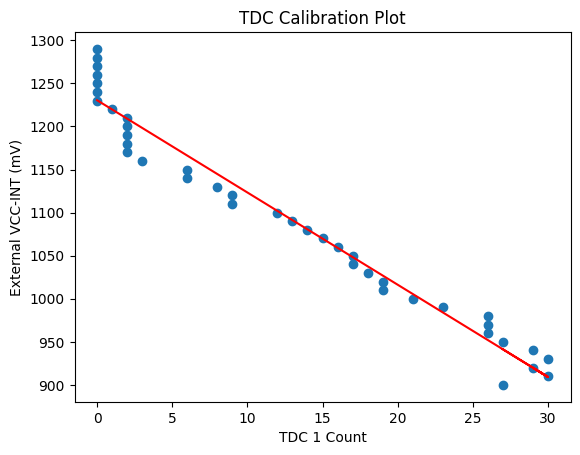

In [257]:
x = []
y = []

for s in """900 mV = 27
910 mV = 30
920 mV = 29
930 mV = 30
940 mV = 29
950 mV = 27
960 mV = 26
970 mV = 26
980 mV = 26
990 mV = 23
1000 mV = 21
1010 mV = 19
1020 mV = 19
1030 mV = 18
1040 mV = 17
1050 mV = 17
1060 mV = 16
1070 mV = 15
1080 mV = 14
1090 mV = 13
1100 mV = 12
1110 mV = 9
1120 mV = 9
1130 mV = 8
1140 mV = 6
1150 mV = 6
1160 mV = 3
1170 mV = 2
1180 mV = 2
1190 mV = 2
1200 mV = 2
1210 mV = 2
1220 mV = 1
1230 mV = 0
1240 mV = 0
1250 mV = 0
1260 mV = 0
1270 mV = 0
1280 mV = 0
1290 mV = 0""".split("\n"):
    values = s.split(" = ")
    mv = int(values[0][:-3])
    result = int(values[1])
    
    y.append(mv)
    x.append(result)

a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)

x = np.array(x)
#add line of best fit to plot
plt.plot(x, a*x+b, 'r')
plt.xlabel("TDC 1 Count")
plt.ylabel("External VCC-INT (mV)")
plt.title("TDC Calibration Plot")
plt.savefig("TDCCalibration.eps", bbox_inches='tight')
plt.savefig("TDCCalibration.png", bbox_inches='tight')

# PicoEMP EMFI

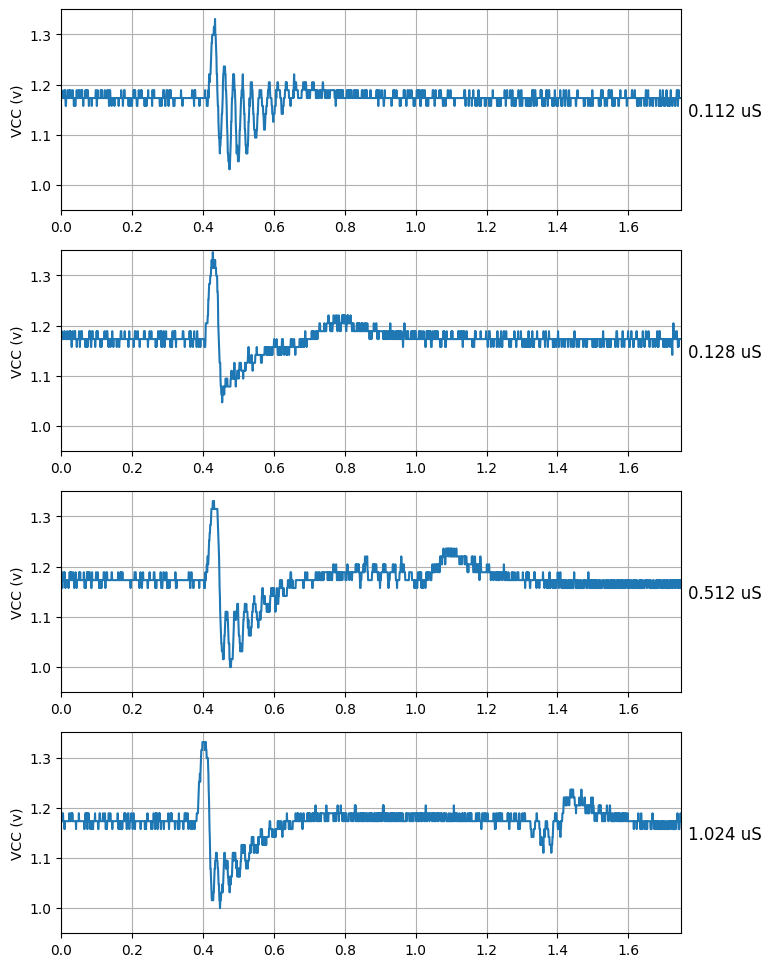

In [290]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,12))

nums = [14, 16, 64, 128]

for i,num in enumerate(nums):
    
    time, wave, trig = read_wave('picoemp-%dpl.csv'%num)
    ax[i].plot(time[3000:5400]*1e6, wave[3000:5400])
    ax[i].set_ylim([0.95, 1.35])
    ax[i].set_xlim([0.0, 1.75])
    ax[i].grid(True)

    ax[i].set_ylabel("VCC (v)")
    ax[i].set_title("%.3f uS"%(0.008*num), rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')

fig.savefig("FigureEMFIWidthEXT.eps", bbox_inches='tight')
fig.savefig("FigureEMFIWidthEXT.png", bbox_inches='tight')

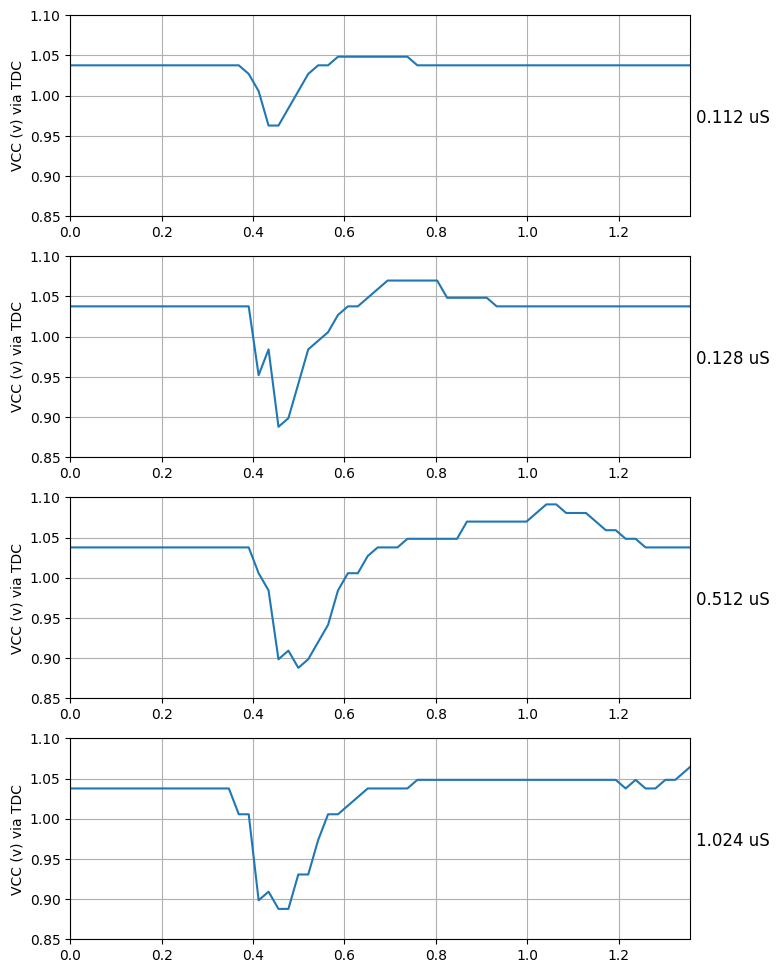

In [357]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,12))

nums = [14, 16, 64, 128]

for i,num in enumerate(nums):

    trace = np.load("../cw308_real/25mhz_tdc_picoemp_%dpl_pltdata.npy"%num)
    y = (a*trace + b) / 1000.0
    x = np.array(list(range(0, len(trace)))) * (1/(25E6*1.843))
    ax[i].plot(x*1e6, y)
    ax[i].set_ylabel("VCC (v) via TDC")
    ax[i].set_xlim([0.0, 2.5/1.843])
    ax[i].set_ylim([0.85, 1.1])
    ax[i].grid(True)
    ax[i].set_title("%.3f uS"%(0.008*num), rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')
  
fig.savefig("FigureEMFIWidthTDC.eps", bbox_inches='tight')
fig.savefig("FigureEMFIWidthTDC.png", bbox_inches='tight')

## Software

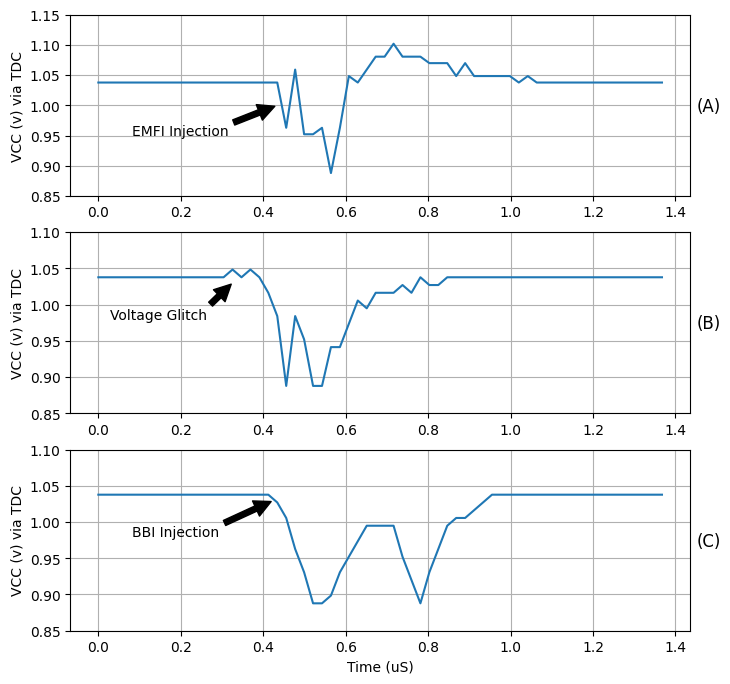

In [360]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

trace = np.load("../cw308_real/sw_25mhz_tdc_15picoempcycles_pltdata.npy")
y = (a*trace + b) / 1000.0
x = np.array(list(range(0, len(trace)))) * (1/(25E6*1.843))
ax[0].plot(x*1e6, y)
ax[0].set_ylabel("VCC (v) via TDC")
ax[0].set_ylim([0.85, 1.15])
ax[0].grid(True)
ax[0].set_title("(A)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')
ax[0].annotate('EMFI Injection', xy=(0.8/1.843, 1.0), xytext=(0.15/1.843, 0.95),
            arrowprops=dict(facecolor='black', shrink=0.05))

trace = np.load("../cw308_real/25mhz_tdc_4cycleglitchonly_vglitch_pltdata.npy")
y = (a*trace + b) / 1000.0
x = np.array(list(range(0, len(trace)))) * (1/(25E6*1.843))
ax[1].plot(x*1e6, y)
#plt.xlabel("Time (uS)")
ax[1].set_ylabel("VCC (v) via TDC")
ax[1].set_ylim([0.85, 1.1])
ax[1].grid(True)
ax[1].set_title("(B)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')
ax[1].annotate('Voltage Glitch', xy=(0.6/1.843, 1.03), xytext=(0.05/1.843, 0.98),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(313)
trace = np.load("../cw308_real/sw_25mhz_tdc_10cyclesenable_bbi_pltdata.npy")
y = (a*trace + b) / 1000.0
x = np.array(list(range(0, len(trace)))) * (1/(25E6*1.843))
ax[2].plot(x*1e6, y)
ax[2].set_xlabel("Time (uS)")
ax[2].set_ylabel("VCC (v) via TDC")
ax[2].set_ylim([0.85, 1.10])
ax[2].grid(True)
ax[2].set_title("(C)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')
ax[2].annotate('BBI Injection', xy=(0.785/1.843, 1.03), xytext=(0.15/1.843, 0.98),
            arrowprops=dict(facecolor='black', shrink=0.05))

fig.savefig("FigureSWVCCTDC.eps", bbox_inches='tight')
fig.savefig("FigureSWVCCTDC.png", bbox_inches='tight')

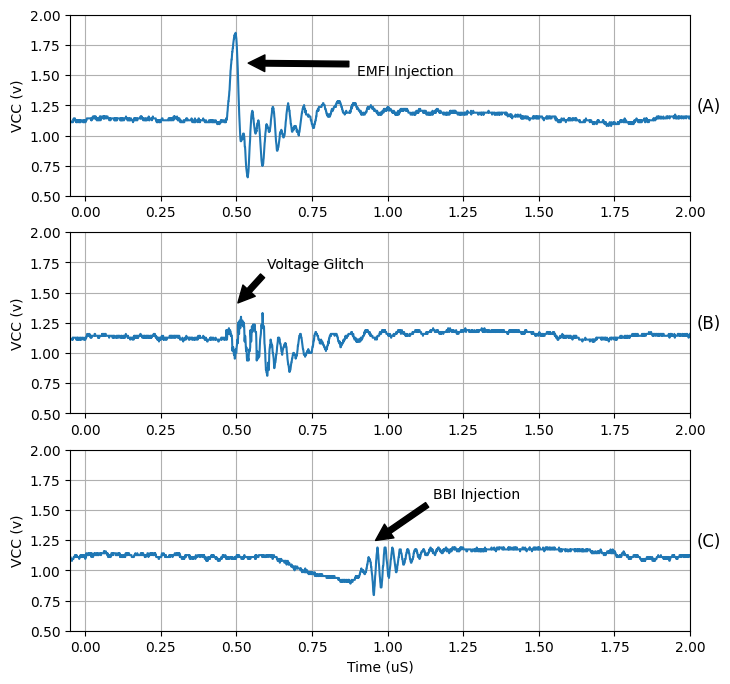

In [359]:
import matplotlib.pylab as plt
import numpy as np

swpico_time, swpico_wave, swpico_trigloc = read_wave('sw-emfi15cyclespicoemp.csv')
swvgl_time, swvgl_wave, swvgl_trigloc = read_wave('sw-vglitch-59nsx4.csv')
swbbi_time, swbbi_wave, swbbi_trigloc = read_wave('sw-bbi-10glitchenables.csv')

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

ax[0].plot(swpico_time[3000:8400]*1e6, swpico_wave[3000:8400])
ax[0].set_ylim([0.5, 2])
ax[0].set_xlim([-0.05, 2.0])
ax[0].grid(True)
ax[0].annotate('EMFI Injection', xy=(0.52, 1.6), xytext=(0.9, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax[0].set_ylabel("VCC (v)")
ax[0].set_title("(A)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')



ax[1].plot(swvgl_time[3000:8400]*1e6, swvgl_wave[3000:8400])
ax[1].set_ylim([0.5, 2])
ax[1].set_xlim([-0.05, 2.0])
ax[1].grid(True)
ax[1].set_ylabel("VCC (v)")
ax[1].annotate('Voltage Glitch', xy=(0.5, 1.4), xytext=(0.6, 1.7),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax[1].set_title("(B)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')


ax[2].plot(swbbi_time[3000:8400]*1e6, swbbi_wave[3000:8400])
ax[2].set_ylim([0.5, 2])
ax[2].set_xlim([-0.05, 2.0])
ax[2].grid(True)
ax[2].set_xlabel("Time (uS)")
ax[2].set_ylabel("VCC (v)")
ax[2].annotate('BBI Injection', xy=(0.95, 1.23), xytext=(1.15, 1.6),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax[2].set_title("(C)", rotation=0, position=(1.01, 0), y=0.45, ha='left', va='center')

fig.savefig("FigureSWVCCEXT.eps", bbox_inches='tight')
fig.savefig("FigureSWVCCEXT.png", bbox_inches='tight')


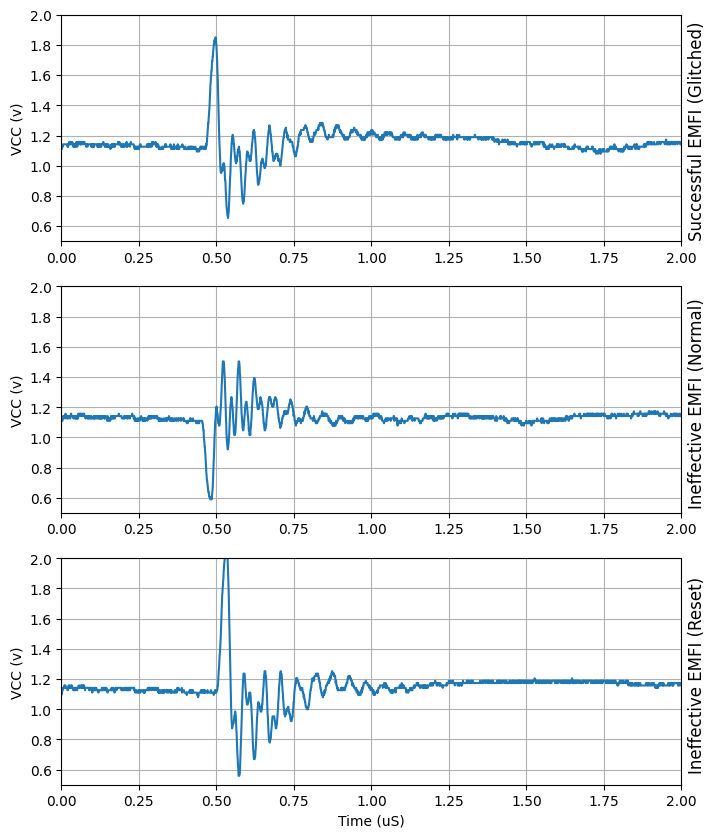

In [343]:
swemfinormal_time, swemfinormal_wave, swemfinormal_trigloc = read_wave('swglitch-ineffective.csv')
swemfireset_time, swemfireset_wave, swemfireset_trigloc = read_wave('swglitch-reset.csv')


fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))

ax[0].plot(swpico_time[3000:8400]*1e6, swpico_wave[3000:8400])
ax[0].set_ylim([0.5, 2])
ax[0].set_xlim([0.0, 2.0])
ax[0].grid(True)
ax[0].set_ylabel("VCC (v)")
ax[0].set_title("Successful EMFI (Glitched)", rotation=90, position=(1.01, 0), y=0.45, ha='left', va='center')


ax[1].plot(swemfinormal_time[3000:8400]*1e6, swemfinormal_wave[3000:8400])
ax[1].set_ylim([0.5, 2])
ax[1].set_xlim([0.0, 2.0])
ax[1].grid(True)
ax[1].set_ylabel("VCC (v)")
ax[1].set_title("Ineffective EMFI (Normal)", rotation=90, position=(1.01, 0), y=0.45, ha='left', va='center')


ax[2].plot(swemfireset_time[3000:8400]*1e6, swemfireset_wave[3000:8400])
ax[2].set_ylim([0.5, 2])
ax[2].set_xlim([0.0, 2.0])
ax[2].grid(True)
ax[2].set_xlabel("Time (uS)")
ax[2].set_ylabel("VCC (v)")
ax[2].set_title("Ineffective EMFI (Reset)", rotation=90, position=(1.01, 0), y=0.45, ha='left', va='center')

fig.savefig("FigureSWVCCEXTEMFICompare.eps", bbox_inches='tight')
fig.savefig("FigureSWVCCEXTEMFICompare.png", bbox_inches='tight')


In [364]:
import pandas as pd

#reads CSV file saved from tektronix
picoemp = pd.read_csv("tek0001ALL.csv", skiprows=20)
chipshouter = pd.read_csv("tek0000ALL.csv", skiprows=20)

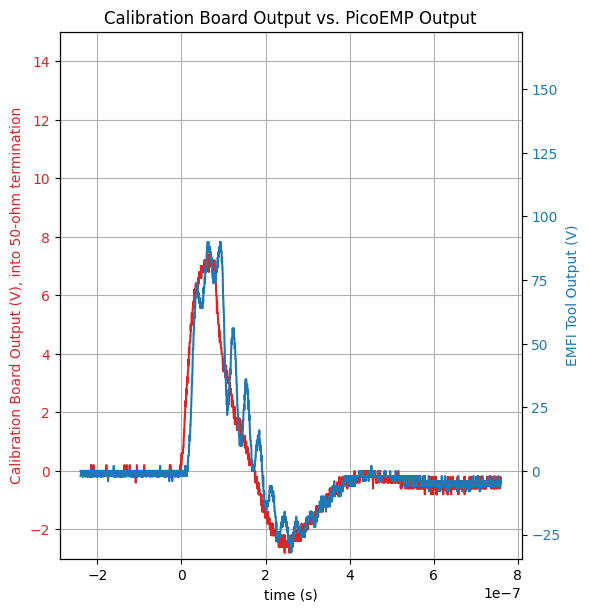

In [402]:
pemp_calout = picoemp["CH2"][4000:6500]
pemp_drive = picoemp["CH3"][4000:6500]
cs_calout = chipshouter["CH2"][4000:6500]
time = picoemp["TIME"][4000:6500]

fig, ax1 = plt.subplots(figsize=(6,6))
plt.grid(True)

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Calibration Board Output (V), into 50-ohm termination', color=color)
ax1.plot(time, pemp_calout, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-3, 15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('EMFI Tool Output (V)', color=color)  # we already handled the x-label with ax1
ax2.plot(time, pemp_drive, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-3*11.5, 15*11.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Calibration Board Output vs. PicoEMP Output")
plt.show()

fig.savefig("caloutput.eps", bbox_inches='tight')
fig.savefig("caloutput.png", bbox_inches='tight')

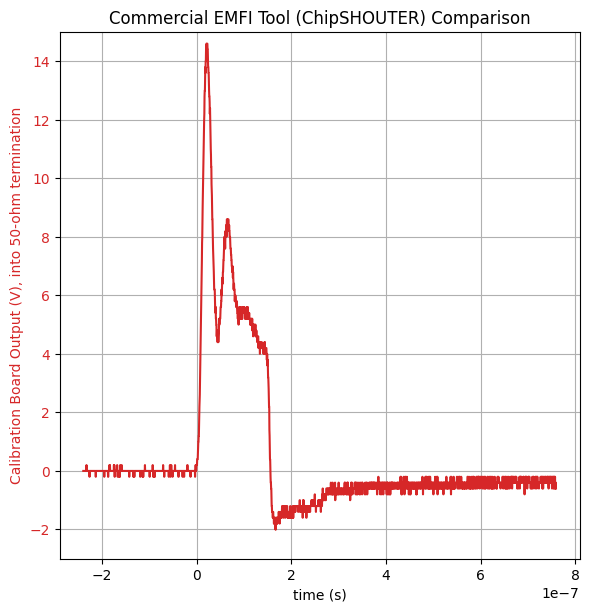

In [403]:
pemp_calout = picoemp["CH2"][4000:6500]
pemp_drive = picoemp["CH3"][4000:6500]
cs_calout = chipshouter["CH2"][4000:6500]
time = picoemp["TIME"][4000:6500]

fig, ax1 = plt.subplots(figsize=(6,6))
plt.grid(True)

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Calibration Board Output (V), into 50-ohm termination', color=color)
ax1.plot(time, cs_calout, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-3, 15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Commercial EMFI Tool (ChipSHOUTER) Comparison")
plt.show()

fig.savefig("caloutputcs.eps", bbox_inches='tight')
fig.savefig("caloutputcs.png", bbox_inches='tight')